1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix 

Eigenvalues: [2.05109743e+01 3.31192664e-15 2.69648199e+00] 

Eigenvectors: [[-0.07305043  0.81649658 -0.57271019]
 [-0.62837344  0.40824829  0.66217834]
 [-0.77447431 -0.40824829 -0.48324205]] 

Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix 

Eigenvalues:
 [2.05109743e+01 3.31192664e-15 2.69648199e+00] 
 [2.05109762e+01 2.69944871e+00 1.33762765e-30] 

Eigenvectors:
 [[-0.07305043  0.81649658 -0.57271019]
 [-0.62837344  0.40824829  0.66217834]
 [-0.77447431 -0.40824829 -0.48324205]] 
 [[-0.07305283  0.57270989 -0.81649658]
 [-0.62837067 -0.66218097 -0.40824829]
 [-0.77447633  0.48323881  0.40824829]] 

Percent of variability, main component: 73.38%
Percent of variability, two features: 1.00%


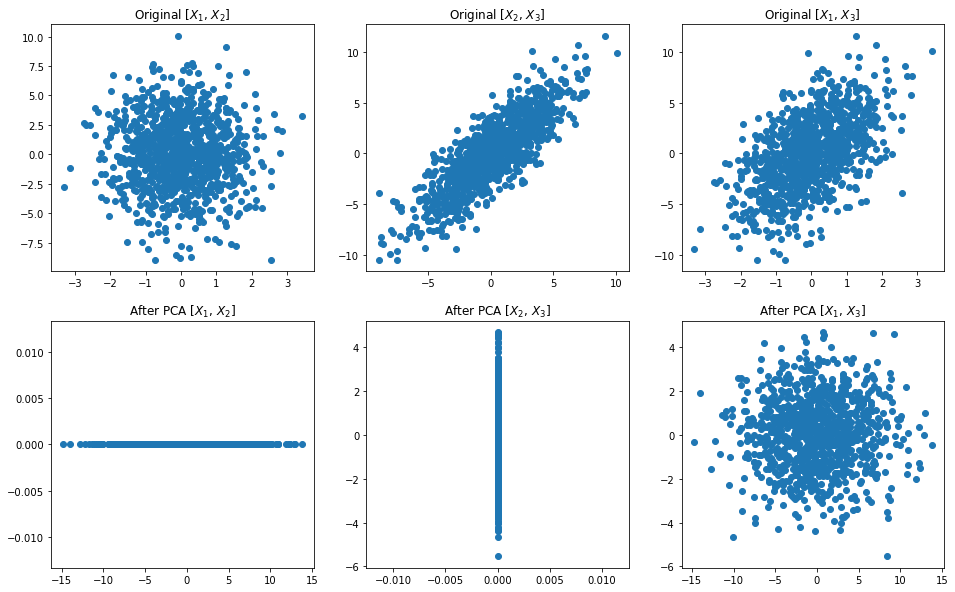

In [13]:
#Generating a dataset 

N = 1000
mu, mu2 = 0, 0
sigma, sigma2 = 1, 3

x1 = np.random.normal(loc=mu, scale=sigma, size=N)
x2 = np.random.normal(loc=mu2, scale=sigma2, size=N)
x3 = 2 * x1 + x2
X = np.array([x1, x2, x3])

# Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

C = np.cov(X)
l, V = np.linalg.eig(C)

print("Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix \n")
print("Eigenvalues:", l, "\n")
print("Eigenvectors:", V, "\n")

# Eigenvectors and eigenvalues using SVD

U, S, Vt = np.linalg.svd(X)
svd = S**2 / (N - 1)

print("Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix \n")
print("Eigenvalues:\n", l, "\n", svd, "\n")
print("Eigenvectors:\n", V, "\n", U, "\n")

print("Percent of variability, main component: %.2f%%" % ((S[0] / S.sum()) * 100))
print("Percent of variability, two features: %.2f%%" % ((S[0] + S[1]) / S.sum()))

# Redefining data according to the PCA

PCA_X = np.dot(V.T, X)

#Plotting original data and PCA

fig, ax = plt.subplots(2, 3, figsize=(16, 10))

ax[0, 0].scatter(X[0], X[1])
ax[0, 0].set_title('Original [$X_1$, $X_2$]')
ax[0, 1].scatter(X[1], X[2],)
ax[0, 1].set_title('Original [$X_2$, $X_3$]')
ax[0, 2].scatter(X[0], X[2])
ax[0, 2].set_title('Original [$X_1$, $X_3$]')

ax[1, 0].scatter(PCA_X[0], PCA_X[1])
ax[1, 0].set_title('After PCA [$X_1$, $X_2$]')
ax[1, 1].scatter(PCA_X[1], PCA_X[2])
ax[1, 1].set_title('After PCA [$X_2$, $X_3$]')
ax[1, 2].scatter(PCA_X[0], PCA_X[2])
ax[1, 2].set_title('After PCA [$X_1$, $X_3$]')

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Covariance matrix:
 [[ 0.99468721 -0.08572457  1.90081046]
 [-0.08572457  9.269423    9.10634221]
 [ 1.90081046  9.10634221 12.93574896]] 

Eigenvalues:
 [2.04949512e+01 4.17455539e-03 2.70073346e+00] 

Eigenvectors:
 [[-0.07276524  0.817077   -0.57191817]
 [-0.62798714  0.40795361  0.66272619]
 [-0.77481441 -0.40738069 -0.48342901]] 


 Using SVD 

Eigenvalues: 
 [2.04949537e+01 2.70402043e+00 4.18019975e-03]
Eigenvectors: 
 [[-0.07276835  0.57195904 -0.81704812]
 [-0.6279838  -0.66270884 -0.40798694]
 [-0.77481683  0.48340444  0.40740523]]


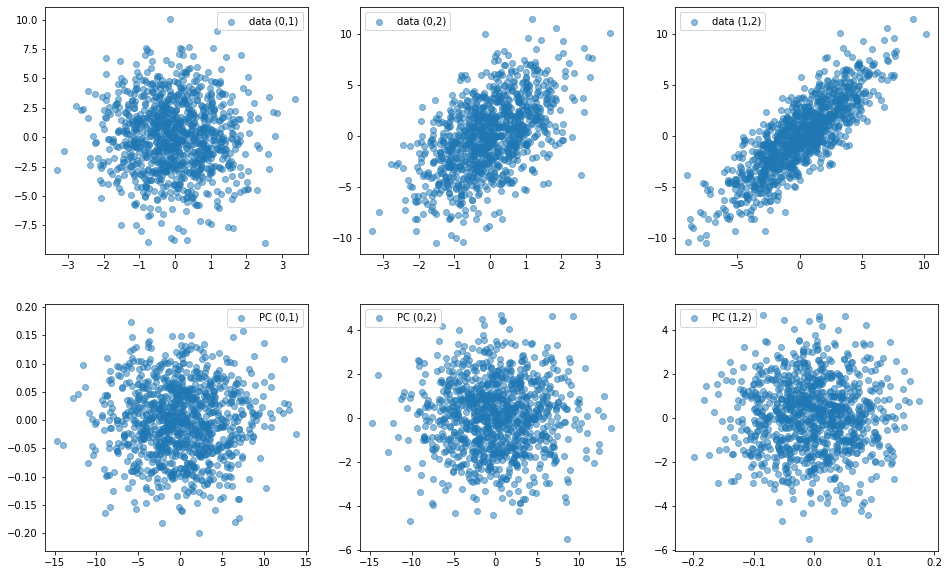

In [17]:
noise = np.random.normal(loc=0, scale=(1/50), size=(3, N, 10))
x_noise = X + np.sum(noise, axis=2)

#Reducing the dimension

cov1 = np.cov(x_noise)

print("Covariance matrix:\n", cov1, '\n')

l1, V1 = np.linalg.eig(cov1)
l1 = np.real_if_close(l1)

U1, s1, Vt1 = np.linalg.svd(x_noise)
l_svd1 = s1**2 / (N-1)
V_svd1 = U1

print("Eigenvalues:\n", l1, '\n')
print("Eigenvectors:\n", V1, '\n')

print('\n Using SVD \n')

print('Eigenvalues: \n', l_svd1)
print('Eigenvectors: \n', V_svd1)

# Plotting

Xp1 = np.dot(V1.T, x_noise)
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10))

axs[0,0].scatter(x_noise[0,:], x_noise[1,:], alpha=0.5, label='data (0,1)')
axs[0,0].legend()
axs[0,1].scatter(x_noise[0,:], x_noise[2,:], alpha=0.5, label='data (0,2)')
axs[0,1].legend()
axs[0,2].scatter(x_noise[1,:], x_noise[2,:], alpha=0.5, label='data (1,2)')
axs[0,2].legend()
axs[1,0].scatter(Xp1[0,:], Xp1[1,:], alpha=0.5, label='PC (0,1)')
axs[1,0].legend()
axs[1,1].scatter(Xp1[0,:], Xp1[2,:], alpha=0.5, label='PC (0,2)')
axs[1,1].legend()
axs[1,2].scatter(Xp1[1,:], Xp1[2,:], alpha=0.5, label='PC (1,2)')
axs[1,2].legend()

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

Eigendecomposition: 


 Eigenvalues: 
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04]

 Eigenvectors: 
 [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e-05  1.81386903e-03  1.88

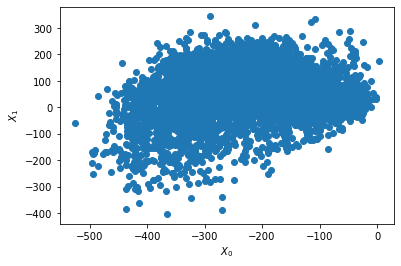

In [24]:
#Loading the dataset

df = pd.read_csv("./data/magic04.data", header=None)
X = df[[0,1,2,3,4,5,6,7,8,9]]
X = X.T

#Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

cov_X = np.cov(X)
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_X)

eig_val_cov = np.real_if_close(eig_val_cov)

i = eig_val_cov.argsort()[::-1]
eig_val_cov = eig_val_cov[i]
eig_vec_cov = eig_vec_cov[:,i]

print("Eigendecomposition: \n")
print("\n Eigenvalues: \n", eig_val_cov)
print("\n Eigenvectors: \n", eig_vec_cov)

var_perc_2 = np.real(np.sum(eig_val_cov[:2])/np.sum(eig_val_cov))*100
var_perc_5 = np.real(np.sum(eig_val_cov[:5])/np.sum(eig_val_cov))*100
var_perc_6 = np.real(np.sum(eig_val_cov[:6])/np.sum(eig_val_cov))*100

print("\n\n")
print(f"The percentual of dataset variability using the 2 principal components is {var_perc_2}%")
print(f"The percentual of dataset variability using the 5 principal components is {var_perc_5}%")
print(f"The percentual of dataset variability using the 6 principal components is {var_perc_6}%")

#Redefining the data in the basis yielded by the PCA procedure

eig_vec_cov_perc = eig_vec_cov[:,:2]
X_perc = np.dot(eig_vec_cov_perc.T, X)

plt.figure()
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.scatter(X_perc[0,:], X_perc[1,:])